In [1]:
import plotly
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
import os
import glob
from tqdm import tqdm
import yaml

In [2]:
df=pd.read_pickle("result.pkl")
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label
0,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,0,3.838186,5.311395e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36
1,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,1,3.894404,4.795416e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36
2,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,2,3.947743,4.486119e-01,"[0.2485583871603012, 0.5979032516479492, 0.201...",-1.000000,md_run_2_1709847450,2,36
3,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,3,4.041379,4.824570e-01,"[-0.12910380959510803, 0.49059078097343445, 0....",-1.000000,md_run_2_1709847450,2,441
4,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,4,4.067689,4.975551e-01,"[0.2707480788230896, 0.4690714478492737, 0.528...",-1.000000,md_run_2_1709847450,2,487
...,...,...,...,...,...,...,...,...,...,...
1028995,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,995,7.538620,1.175796e-20,"[-0.48277848958969116, 0.3115301728248596, 0.5...",-1.000000,md_run_7_1710304265,7,310
1028996,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,996,7.622481,7.734367e-21,"[-0.30358684062957764, 0.23337039351463318, 0....",-1.025333,md_run_7_1710304265,7,310
1028997,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,997,7.734472,1.222995e-20,"[-0.30083298683166504, 0.015502158552408218, 0...",-1.299760,md_run_7_1710304265,7,266
1028998,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,998,7.671970,4.933934e-21,"[-0.047341570258140564, 0.10725318640470505, 0...",-1.369596,md_run_7_1710304265,7,136


In [3]:
#to determine if the MD simulation started from a checkpoint (save the cpt in that case) or outlier
for label in df.sys_label.unique():
    setup=yaml.safe_load(open(f"../md_run/{label}/setting.yml", 'r'))
    if setup['checkpoint']:
        df.loc[(df['sys_label'] == label),['cpt']]= setup['checkpoint'].split('/')[-2]  # sim label from which the cpt came
    elif 'md_run' in setup['pdb_file']:   # started from an outlier
        #print(setup['pdb_file'])
        df.loc[(df['sys_label'] == label),['outlier_MD_label']]=setup['pdb_file'].split('.pd')[0].split('/')[-1].split('_00')[0]
        df.loc[(df['sys_label'] == label),['outlier_MD_frame']]=int(setup['pdb_file'].split('.pd')[0].split('_')[-1])
    df.loc[(df['sys_label'] == label),['wall_clockt']]=int(label.split('_')[-1])  # to add column for starting wall clock times
print (df)

                                                       pdb  \
0        /project/zerze/ayushg/argonne/configs/multiICs...   
1        /project/zerze/ayushg/argonne/configs/multiICs...   
2        /project/zerze/ayushg/argonne/configs/multiICs...   
3        /project/zerze/ayushg/argonne/configs/multiICs...   
4        /project/zerze/ayushg/argonne/configs/multiICs...   
...                                                    ...   
1028995  /project/zerze/ayushg/argonne/ddmd/rna13/test_...   
1028996  /project/zerze/ayushg/argonne/ddmd/rna13/test_...   
1028997  /project/zerze/ayushg/argonne/ddmd/rna13/test_...   
1028998  /project/zerze/ayushg/argonne/ddmd/rna13/test_...   
1028999  /project/zerze/ayushg/argonne/ddmd/rna13/test_...   

                                                       dcd  frame      rmsd  \
0        /project/zerze/ayushg/argonne/ddmd/rna13/test_...      0  3.838186   
1        /project/zerze/ayushg/argonne/ddmd/rna13/test_...      1  3.894404   
2        /project/

In [8]:
"/project/zerze/ayushg/argonne/ddmd/rna13/test_f_Q0.5/md_run/md_run_2_1709176908/md_run_5_1709174342_000364.pdb".split('.pd')[0].split('/')[-1].split('_00')[0]

'md_run_5_1709174342'

In [19]:
if "md_run_5_1695383573" in df.outlier_MD_label.unique():
    print ("yes")
else: print("no")

yes


In [137]:
type(df.outlier_MD_frame.unique()[3])

numpy.float64

In [4]:
df.outlier_MD_label.unique()

array([nan, 'md_run_6_1709850043', 'md_run_7_1709847450',
       'md_run_6_1709857855', 'md_run_3_1709862919',
       'md_run_5_1709860371', 'md_run_3_1709847450',
       'md_run_5_1709852639', 'md_run_4_1709873430',
       'md_run_6_1709881333', 'md_run_4_1709847450',
       'md_run_5_1709847450', 'md_run_2_1709878614',
       'md_run_7_1709897044', 'md_run_2_1709891615',
       'md_run_7_1709894422', 'md_run_4_1709915364',
       'md_run_7_1709907546', 'md_run_5_1709920617',
       'md_run_5_1709915339', 'md_run_3_1709896675',
       'md_run_2_1709941448', 'md_run_3_1709920208',
       'md_run_2_1709899431', 'md_run_5_1709946975',
       'md_run_5_1709923241', 'md_run_5_1709952280',
       'md_run_6_1709944377', 'md_run_4_1709947022',
       'md_run_7_1709944454', 'md_run_2_1709936181',
       'md_run_3_1709967467', 'md_run_3_1709970099',
       'md_run_7_1709955009', 'md_run_4_1709936473',
       'md_run_4_1709928554', 'md_run_5_1709962849',
       'md_run_6_1709973380', 'md_run_6_1

In [41]:
print((df['pdb'].value_counts().to_list()))

[38000, 38000, 22000, 20000, 15000, 15000, 13000, 13000, 11000, 10000, 10000, 9000, 8000, 8000, 8000, 8000, 8000, 8000, 8000, 7000, 7000, 6000, 6000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 4000, 4000, 4000, 4000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 3000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [24]:
df.loc[(df['sys_label']=="md_run_1_1692129940") & (df['frame']==260)]

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label
136260,/project/zerze/ayushg/argonne/ddmd/rna3/test/m...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,260,7.546634,7.691138e-15,"[1.0004034042358398, -0.9496617317199707, 0.17...",-0.997536,md_run_1_1692129940,1,473


In [5]:
# to form md_steps array for the whole df
timeline = {}
md_step=[]
c=0
for gpu_id in df.gpu_id.unique(): 
    sub_df = df[df.gpu_id == gpu_id]
    i=0                      # simulation no. (starting from 0) for the particular GPU id
    for sys_label in sub_df.sys_label.unique(): 
        #current_time = int(sys_label.split('_')[-1]) - 1692329418     # mapping the wall clock starting time of simulation to the beginning of the main job
        #timeline[f"gpu_{gpu_id}"].append(current_time)
        t = list(map(lambda x: x + i*1000, sub_df[sub_df.sys_label == sys_label]['frame'].to_list()))
        c+=1
        #print(len(t),c)
        md_step+=t
        #sub_df.loc[sub_df.sys_label == sys_label]['md_step']=t.copy()
        i+=1

In [6]:
print(len(md_step),max(md_step))

1029000 171999


In [7]:
len(df)

1029000

In [8]:
df['md_step']=md_step.copy()
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,wall_clockt,cpt,outlier_MD_label,outlier_MD_frame,md_step
0,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,0,3.838186,5.311395e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,0
1,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,1,3.894404,4.795416e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,1
2,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,2,3.947743,4.486119e-01,"[0.2485583871603012, 0.5979032516479492, 0.201...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,2
3,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,3,4.041379,4.824570e-01,"[-0.12910380959510803, 0.49059078097343445, 0....",-1.000000,md_run_2_1709847450,2,441,1.709847e+09,NaN,NaN,NaN,3
4,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,4,4.067689,4.975551e-01,"[0.2707480788230896, 0.4690714478492737, 0.528...",-1.000000,md_run_2_1709847450,2,487,1.709847e+09,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028995,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,995,7.538620,1.175796e-20,"[-0.48277848958969116, 0.3115301728248596, 0.5...",-1.000000,md_run_7_1710304265,7,310,1.710304e+09,md_run_7_1710301593,NaN,NaN,171995
1028996,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,996,7.622481,7.734367e-21,"[-0.30358684062957764, 0.23337039351463318, 0....",-1.025333,md_run_7_1710304265,7,310,1.710304e+09,md_run_7_1710301593,NaN,NaN,171996
1028997,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,997,7.734472,1.222995e-20,"[-0.30083298683166504, 0.015502158552408218, 0...",-1.299760,md_run_7_1710304265,7,266,1.710304e+09,md_run_7_1710301593,NaN,NaN,171997
1028998,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,998,7.671970,4.933934e-21,"[-0.047341570258140564, 0.10725318640470505, 0...",-1.369596,md_run_7_1710304265,7,136,1.710304e+09,md_run_7_1710301593,NaN,NaN,171998


In [47]:
sdf=df[(df.outlier_MD_label=="md_run_5_1695383573") & (df.frame==0)].sort_values('md_step')
(sdf)
#for i in sdf['sys_label'].unique():
 #   print (i)

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,cpt,outlier_MD_label,outlier_MD_frame,md_step
538000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.388691,0.999786,"[-0.42826682329177856, 0.21385696530342102, 0....",-1.000000,md_run_6_1695391688,6,69,NaN,md_run_5_1695383573,769.0,26000
167000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.268947,0.999841,"[-0.2964535653591156, 0.16044624149799347, 0.1...",-0.977688,md_run_3_1695425491,3,22,NaN,md_run_5_1695383573,609.0,39000
551000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.406328,0.999680,"[-1.7240772247314453, -0.5952456593513489, 0.6...",-1.051344,md_run_6_1695425903,6,274,NaN,md_run_5_1695383573,609.0,39000
469000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.188217,0.999683,"[-0.7599204778671265, -0.8260247111320496, 0.1...",-1.080043,md_run_5_1695547248,5,496,NaN,md_run_5_1695383573,541.0,85000
345000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.267286,0.999647,"[-0.06221838667988777, -0.7737317085266113, -1...",-1.061977,md_run_4_1695557938,4,317,NaN,md_run_5_1695383573,541.0,89000
767000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.180663,0.999888,"[0.4235818088054657, -1.3609505891799927, 0.03...",-1.054980,md_run_7_1695660115,7,37,NaN,md_run_5_1695383573,377.0,127000


In [170]:
sdf=df[(df.outlier_MD_label=="md_run_5_1695383573") & (df.frame==0)].sort_values('md_step')
for i,md_step in enumerate(sdf.md_step.unique()):
    for outlier_MD_frame in sdf[sdf.md_step==md_step].outlier_MD_frame.unique():
        print (len(sdf[(sdf.md_step==md_step) & (sdf.outlier_MD_frame==outlier_MD_frame)]))
        
    print(md_step,sdf.groupby(['md_step','outlier_MD_frame']).size().iloc[i])
print(len(sdf))
(sdf)

1
26000 1
2
39000 2
1
85000 1
1
89000 1
1
127000 1
6


,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,cpt,outlier_MD_label,outlier_MD_frame,md_step,weight
538000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.388691,0.999786,"[-0.42826682329177856, 0.21385696530342102, 0....",-1.000000,md_run_6_1695391688,6,69,NaN,md_run_5_1695383573,769.0,26000,1
167000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.268947,0.999841,"[-0.2964535653591156, 0.16044624149799347, 0.1...",-0.977688,md_run_3_1695425491,3,22,NaN,md_run_5_1695383573,609.0,39000,1
551000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.406328,0.999680,"[-1.7240772247314453, -0.5952456593513489, 0.6...",-1.051344,md_run_6_1695425903,6,274,NaN,md_run_5_1695383573,609.0,39000,1
469000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.188217,0.999683,"[-0.7599204778671265, -0.8260247111320496, 0.1...",-1.080043,md_run_5_1695547248,5,496,NaN,md_run_5_1695383573,541.0,85000,1
345000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.267286,0.999647,"[-0.06221838667988777, -0.7737317085266113, -1...",-1.061977,md_run_4_1695557938,4,317,NaN,md_run_5_1695383573,541.0,89000,1
767000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.180663,0.999888,"[0.4235818088054657, -1.3609505891799927, 0.03...",-1.054980,md_run_7_1695660115,7,37,NaN,md_run_5_1695383573,377.0,127000,1


In [12]:
df['weight']=1
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,wall_clockt,cpt,outlier_MD_label,outlier_MD_frame,md_step,weight
0,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,0,3.838186,5.311395e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,0,1
1,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,1,3.894404,4.795416e-01,"[0.017263397574424744, 0.738886833190918, 0.30...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,1,1
2,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,2,3.947743,4.486119e-01,"[0.2485583871603012, 0.5979032516479492, 0.201...",-1.000000,md_run_2_1709847450,2,36,1.709847e+09,NaN,NaN,NaN,2,1
3,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,3,4.041379,4.824570e-01,"[-0.12910380959510803, 0.49059078097343445, 0....",-1.000000,md_run_2_1709847450,2,441,1.709847e+09,NaN,NaN,NaN,3,1
4,/project/zerze/ayushg/argonne/configs/multiICs...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,4,4.067689,4.975551e-01,"[0.2707480788230896, 0.4690714478492737, 0.528...",-1.000000,md_run_2_1709847450,2,487,1.709847e+09,NaN,NaN,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028995,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,995,7.538620,1.175796e-20,"[-0.48277848958969116, 0.3115301728248596, 0.5...",-1.000000,md_run_7_1710304265,7,310,1.710304e+09,md_run_7_1710301593,NaN,NaN,171995,1
1028996,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,996,7.622481,7.734367e-21,"[-0.30358684062957764, 0.23337039351463318, 0....",-1.025333,md_run_7_1710304265,7,310,1.710304e+09,md_run_7_1710301593,NaN,NaN,171996,1
1028997,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,997,7.734472,1.222995e-20,"[-0.30083298683166504, 0.015502158552408218, 0...",-1.299760,md_run_7_1710304265,7,266,1.710304e+09,md_run_7_1710301593,NaN,NaN,171997,1
1028998,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,/project/zerze/ayushg/argonne/ddmd/rna13/test_...,998,7.671970,4.933934e-21,"[-0.047341570258140564, 0.10725318640470505, 0...",-1.369596,md_run_7_1710304265,7,136,1.710304e+09,md_run_7_1710301593,NaN,NaN,171998,1


In [177]:
df.loc[(df.sys_label=="md_run_7_1695660115") & (df.frame >= 997), ['weight']]/=2
df.loc[(df.sys_label=="md_run_7_1695660115") & (df.frame >= 997), ['weight']]

,weight
767997,0.5
767998,0.5
767999,0.5


In [181]:
df.loc[(df.sys_label=="md_run_7_1695660115") & (df.frame == 999)]['weight']

767999    0.5
Name: weight, dtype: float64

In [13]:
#changing the weights
print(int(len(df)/6))
mds=0     # will be used to iterate over md steps (multiples of 1000)
while mds < int(len(df)/6):
    for sys_label in df[df.md_step==mds].sys_label.unique():   # iterate over sys_labels at the same md_step
        #print(df[df.sys_label==sys_label])
        if df.loc[(df['sys_label']==sys_label) & (df['frame']==0)]['cpt'].to_list() and mds!=0: # if cpt exists: weight should be the same as that of the continued traj
            gpu_id=str(int(df.loc[(df.sys_label==sys_label) & (df.frame==0)]['gpu_id']))
            #print(gpu_id)
            df.loc[(df.sys_label==sys_label),['weight']]=float(df.loc[(df.gpu_id==gpu_id) & (df.md_step==mds-1)]['weight'])  # weight should be equal to the wt of frame at the previous md_step. 
            #print(df.loc[(df['gpu_id']==gpu_id) & (df['md_step']==mds-1)])
            
            
        # to reweight outlier trajectories
        if sys_label in df.outlier_MD_label.unique():
            sdf=df[(df.outlier_MD_label == sys_label) & (df.frame==0)].sort_values('md_step')   # which simulations had an outlier IC from this sys_label. Need to sort wrt md_step becoz reweighting should be done in the order of outlier detection
            for md_step in sdf.md_step.unique():        
                for outlier_MD_frame in sdf[sdf.md_step==md_step].outlier_MD_frame.unique():
                    fac=len(sdf[(sdf.md_step==md_step) & (sdf.outlier_MD_frame==outlier_MD_frame)])  # how many simulations started from the exact same outlier frame at this md_step 
                    print(fac)
                    df.loc[(df.sys_label==sys_label) & (df.frame >= outlier_MD_frame), ['weight']]/=(fac+1)  # reweight the parent trajectory
                    df.loc[(df.outlier_MD_label==sys_label) & (df.md_step >= md_step) & (df.md_step <= (md_step+999)), ['weight']]= float(df.loc[(df.sys_label==sys_label) & (df.frame == 999)]['weight'])  # reweight the child trajectory(ies)
            #print(sdf)
    #print(mds)
    mds+=1000      # move on to next set of simulations  
#df

171500
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
2
1
1
1
1
1
2
2
2
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
2
2
1
2
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
1
2
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
1
2
1
1
1
2
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
2
1
1
2
1
1
2
1
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

                                                      pdb  \
963000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
963000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.403826   

               Q                                         embeddings  \
963000  0.261664  [0.4205874800682068, 0.6462574601173401, -1.02...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
963000  -1.137993  md_run_6_1697276869      6            381  1.697277e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
963000  NaN  md_run_6_1697170989              82.0    62000     1.0  
                                                      pdb  \
474000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
474000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.258467   



                                                       pdb  \
702000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
933000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1158000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
715000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
502000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
702000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.733758   
933000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.774911   
1158000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.775782   
715000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.144532   
502000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.717458   

                Q                                         embeddings  \
702000   0.127065  [-0.40975335240364075, 0.4001021981239319, 1.7...   
933000  

                                                      pdb  \
939000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
939000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.344074   

               Q                                         embeddings  \
939000  0.000001  [-0.08905251324176788, -0.6864911913871765, 0....   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
939000       -1.0  md_run_6_1697213153      6             95  1.697213e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
939000  NaN  md_run_6_1697181505              21.0    38000     1.0  
                                                       pdb  \
28000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
253000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1154000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
709000   /project/zerze/ayushg/a

                                                      pdb  \
32000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
257000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
708000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
32000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.717818   
257000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.661502   
708000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.729348   

               Q                                         embeddings  \
32000   0.003776  [-0.7215069532394409, -0.20375889539718628, 0....   
257000  0.007048  [-0.283432275056839, -0.40280699729919434, 0.5...   
708000  0.000203  [-0.08938691020011902, -0.1582384705543518, 0....   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
32000        -1.0  md_run_2_1697196926      2            241  1.697197e+09   
2

                                                      pdb  \
260000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
485000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
936000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
260000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.579274   
485000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.331954   
936000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.099660   

                   Q                                         embeddings  \
260000  3.969745e-18  [0.651121973991394, -0.7338123917579651, 0.441...   
485000  5.934590e-17  [0.651121973991394, -0.7338123917579651, 0.441...   
936000  2.333504e-15  [0.738865077495575, -0.5471856594085693, 0.356...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
260000       -1.0  md_run_3_1697204856      3            327  1

                                                      pdb  \
265000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
265000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.966099   

               Q                                         embeddings  \
265000  0.000096  [0.33035796880722046, -0.42361417412757874, -0...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
265000       -1.0  md_run_3_1697218047      3            421  1.697218e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
265000  NaN  md_run_7_1697194558             676.0    40000     1.0  
31000
                                                       pdb  \
67000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1202000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
67000   

                                                       pdb  \
36000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
261000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
486000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
937000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1162000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
724000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
36000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.546173   
261000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.470339   
486000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.739762   
937000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.754650   
1162000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.556364   
724000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.043646   

           

                                                      pdb  \
120000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
571000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
120000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.276223   
571000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.208561   

               Q                                         embeddings  \
120000  0.000056  [0.5815083980560303, -0.9471360445022583, -0.9...   
571000  0.000257  [0.8291712999343872, -0.556475043296814, -0.51...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
120000  -1.188989  md_run_2_1697432312      2            371  1.697432e+09   
571000  -1.258045  md_run_4_1697434135      4            147  1.697434e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
120000  NaN  md_run_6_1697202581             479.0   120000   

                                                       pdb  \
1174000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1174000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.467199   

                Q                                         embeddings  \
1174000  0.111553  [-0.05926746875047684, -0.6673986315727234, -0...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1174000  -1.088483  md_run_7_1697239369      7            434  1.697239e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1174000  NaN  md_run_6_1697207853             523.0    48000     1.0  
36000
                                                       pdb  \
1175000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
953000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  

                                                      pdb  \
294000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
294000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.713932   

               Q                                         embeddings  \
294000  0.150986  [-0.1600196361541748, 0.03157138079404831, 1.1...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
294000       -1.0  md_run_3_1697295017      3             71  1.697295e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
294000  NaN  md_run_4_1697218002             604.0    69000     1.0  
40000
                                                       pdb  \
1224000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1224000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.0

                                                       pdb  \
506000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1182000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1004000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
506000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.010192   
1182000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  4.832269   
1004000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.425498   

                    Q                                         embeddings  \
506000   9.802080e-08  [0.29864993691444397, -1.1815043687820435, -1....   
1182000  4.129674e-02  [0.5061476826667786, -1.0013459920883179, -1.1...   
1004000  6.995648e-10  [0.040191151201725006, -1.0176770687103271, -2...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
506000   -1.081722  md_run_4_1697260255      4    

                                                       pdb  \
726000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
951000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
730000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1180000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
995000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
726000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.247299   
951000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.234638   
730000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.600066   
1180000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.130239   
995000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.467393   

                Q                                         embeddings  \
726000   0.120597  [-0.4400302767753601, 0.9060741066932678, 0.37...   
951000  

                                                       pdb  \
73000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
761000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1109000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1338000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
73000    /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.660105   
761000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.768990   
1109000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.004623   
1338000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.842326   

                Q                                         embeddings  \
73000    0.070509  [-1.5663875341415405, 0.2312169075012207, -0.2...   
761000   0.028392  [-1.3781936168670654, 0.352010041475296, -0.19...   
1109000  0.001870  [-0.8657532930374146, 0.12246474623680115, 0.4...   
13380

                                                      pdb  \
605000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
605000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.846727   

               Q                                         embeddings  \
605000  0.320968  [-0.6770679950714111, 1.1735782623291016, 0.00...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
605000        0.0  md_run_4_1697526081      4            160  1.697526e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
605000  NaN  md_run_4_1697244383             703.0   155000     1.0  
                                                      pdb  \
286000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
511000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
587000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
864000  /project/zerze/ayushg/argonn

                                                       pdb  \
1181000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1181000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.358904   

                Q                                         embeddings  \
1181000  0.185563  [-0.2405802607536316, 0.41389673948287964, 0.5...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1181000  -0.995999  md_run_7_1697257984      7             15  1.697258e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1181000  NaN  md_run_3_1697249791             404.0    55000     1.0  
                                                      pdb  \
295000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
989000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
405000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                         

                                                      pdb  \
790000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
165000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
790000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.153919   
165000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.974711   

               Q                                         embeddings  \
790000  0.004135  [0.11641286313533783, 0.4619543254375458, 0.45...   
165000  0.015358  [0.4640079140663147, 0.7867432832717896, -0.35...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
790000       -1.0  md_run_5_1697416336      5              5  1.697416e+09   
165000       -1.0  md_run_2_1697553626      2            440  1.697554e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
790000  NaN  md_run_6_1697255565             657.0   114000   

                                                       pdb  \
965000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
292000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
296000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1204000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
965000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.852072   
292000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.023106   
296000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.964884   
1204000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.803422   

                Q                                         embeddings  \
965000   0.043540  [0.5594689249992371, 0.1096741184592247, -1.47...   
292000   0.059420  [0.5717841386795044, -0.28177353739738464, -0....   
296000   0.019014  [-0.16347330808639526, -0.07241956144571304, -...   
12040

                                                      pdb  \
549000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
775000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
549000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.771818   
775000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.900188   

                   Q                                         embeddings  \
549000  1.480288e-08  [-0.8844764232635498, -0.290870726108551, -0.8...   
775000  6.096421e-10  [-1.0731475353240967, -0.34697550535202026, -0...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
549000    0.00000  md_run_4_1697375278      4            148  1.697375e+09   
775000   -1.04635  md_run_5_1697375393      5            199  1.697375e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
549000  NaN  md_run_5_1697263318             807.0

                                                       pdb  \
1276000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1276000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.575157   

                Q                                         embeddings  \
1276000  0.231908  [0.2445104569196701, -0.4094352424144745, 1.97...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1276000        0.0  md_run_7_1697513837      7             16  1.697514e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1276000  NaN  md_run_6_1697268875             141.0   150000     1.0  
                                                      pdb  \
96000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
321000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
399000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                         

                                                       pdb  \
776000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1226000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
776000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.458555   
1226000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.438900   

                Q                                         embeddings  \
776000   0.000007  [0.7966076135635376, -0.6720650792121887, 0.67...   
1226000  0.000002  [0.8320223093032837, -0.5901243090629578, 0.63...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
776000        -1.0  md_run_5_1697378049      5             12  1.697378e+09   
1226000        0.0  md_run_7_1697378491      7            154  1.697378e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
776000   NaN  md_run_5_1697279162             670

                                                      pdb  \
783000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
783000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.924289   

              Q                                         embeddings  lof_score  \
783000  0.23089  [-0.6688552498817444, 0.848680853843689, -0.30...        0.0   

                  sys_label gpu_id  cluster_label   wall_clockt  cpt  \
783000  md_run_5_1697397108      5            294  1.697397e+09  NaN   

           outlier_MD_label  outlier_MD_frame  md_step  weight  
783000  md_run_6_1697287481             642.0   107000     1.0  
66000
                                                       pdb  \
975000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1235000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
975000   /

                                                       pdb  \
1249000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1249000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.490051   

                Q                                         embeddings  \
1249000  0.022434  [-0.7029622197151184, 0.5651485323905945, 0.39...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1249000       -1.0  md_run_7_1697441272      7            305  1.697441e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1249000  NaN  md_run_7_1697292594             193.0   123000     1.0  
68000
                                                      pdb  \
763000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
351000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
577000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                   

                                                      pdb  \
301000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
756000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
87000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
301000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.785368   
756000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.739163   
87000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.810324   

               Q                                         embeddings  \
301000  0.031797  [-1.704831838607788, -0.26872098445892334, 0.7...   
756000  0.013339  [-1.5770565271377563, 0.07190591841936111, 0.9...   
87000   0.023230  [-1.7896138429641724, -0.2307000756263733, 0.9...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
301000       -1.0  md_run_3_1697313729      3            419  1.697314e+09   
7

                                                       pdb  \
364000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
589000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
862000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1312000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
364000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.036461   
589000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.114051   
862000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.018951   
1312000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.935932   

                Q                                         embeddings  \
364000   0.008370  [-0.644890546798706, -0.03760875016450882, -0....   
589000   0.003259  [-0.596569836139679, -0.0971134826540947, 0.03...   
862000   0.161119  [-1.1227648258209229, 0.8809450268745422, -0.6...   
13120

77000
                                                       pdb  \
1039000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1265000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1039000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.092392   
1265000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.207428   

                Q                                         embeddings  \
1039000  0.138042  [-0.4084654748439789, 0.5948039293289185, 0.33...   
1265000  0.131524  [-0.44571560621261597, 0.6099203824996948, 0.3...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1039000  -1.211773  md_run_6_1697483040      6            454  1.697483e+09   
1265000  -1.214557  md_run_7_1697484194      7            454  1.697484e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1039000  NaN  md_run_2_1697318883          

                                                      pdb  \
312000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
312000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.181368   

               Q                                         embeddings  \
312000  0.011022  [-1.3717364072799683, -0.8047943115234375, 0.0...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
312000  -1.270381  md_run_3_1697343334      3            350  1.697343e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
312000  NaN  md_run_5_1697324516              35.0    87000     1.0  
80000
                                                      pdb  \
331000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
331000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.57675

                                                       pdb  \
1230000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1230000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.624527   

                    Q                                         embeddings  \
1230000  4.925320e-14  [0.4021208882331848, -0.6725297570228577, 0.15...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1230000       -1.0  md_run_7_1697389545      7             23  1.697390e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1230000  NaN  md_run_7_1697332704             724.0   104000     1.0  
83000
                                                       pdb  \
1074000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1074000  /project/zerze/ayushg/argonne/ddmd/rna8/tes

                                                      pdb  \
567000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
567000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.045953   

               Q                                         embeddings  \
567000  0.041884  [-0.5405024886131287, 0.4678153991699219, -0.4...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
567000       -1.0  md_run_4_1697423455      4             21  1.697423e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
567000  NaN  md_run_5_1697340544             733.0   117000     1.0  
                                                      pdb  \
992000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
547000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
992000  /project/z

                                                      pdb  \
342000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame     rmsd  \
342000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  4.62727   

               Q                                         embeddings  \
342000  0.515925  [-0.1850155144929886, -0.3296847939491272, -0....   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
342000  -1.014614  md_run_3_1697424868      3             27  1.697425e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
342000  NaN  md_run_7_1697346205             799.0   117000     1.0  
88000
                                                     pdb  \
91000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                     dcd  frame      rmsd  \
91000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.148252   



                                                      pdb  \
141000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
366000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
141000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.171087   
366000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.149992   

               Q                                         embeddings  \
141000  0.000216  [-0.9300651550292969, 0.36464595794677734, -0....   
366000  0.000294  [-0.7239718437194824, 0.8011612892150879, -1.0...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
141000  -1.000000  md_run_2_1697489057      2            368  1.697489e+09   
366000  -1.158153  md_run_3_1697490027      3            368  1.697490e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
141000  NaN  md_run_2_1697353795              74.0   141000   

95000
                                                      pdb  \
431000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
882000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
657000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
431000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.077064   
882000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.089716   
657000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.994006   

                   Q                                         embeddings  \
431000  1.711891e-07  [-1.0565335750579834, 0.5014525055885315, -1.2...   
882000  2.900565e-05  [-1.5350961685180664, 0.02511495351791382, -0....   
657000  5.187461e-07  [-1.5188391208648682, 0.1288631558418274, -0.5...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
431000       -1.0  md_run_3_1697665864      3            

                                                       pdb  \
1011000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
561000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1011000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.904037   
561000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.026739   

                Q                                         embeddings  \
1011000  0.004277  [-1.3945716619491577, -1.0091930627822876, 0.4...   
561000   0.008734  [-1.484674096107483, -0.9840734004974365, 0.35...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1011000       -1.0  md_run_6_1697406343      6            312  1.697406e+09   
561000        -1.0  md_run_4_1697407479      4            312  1.697407e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1011000  NaN  md_run_6_1697382029             124

106000
                                                       pdb  \
1239000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1239000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.333746   

                Q                                         embeddings  \
1239000  0.184261  [-0.11418722569942474, -0.34076762199401855, -...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1239000  -1.018071  md_run_7_1697414416      7            108  1.697414e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1239000  NaN  md_run_4_1697396750             705.0   113000     1.0  
                                                       pdb  \
1012000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1012000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m... 

                                                       pdb  \
1018000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
118000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1253000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1018000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.835918   
118000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.936510   
1253000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.859310   

                Q                                         embeddings  \
1018000  0.089681  [-0.4872780740261078, 0.12287172675132751, -0....   
118000   0.128507  [-0.5412375330924988, 0.03252943605184555, -0....   
1253000  0.179602  [-0.6463502049446106, -0.03288254886865616, -0...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1018000   0.000000  md_run_6_1697425433      6            234  1.6

116000
                                                       pdb  \
803000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1028000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
1119000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
803000   /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  7.055300   
1028000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.859810   
1119000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.923279   

                Q                                         embeddings  \
803000   0.173075  [-0.4352414906024933, 0.1757407784461975, -0.3...   
1028000  0.118455  [-0.41068047285079956, 0.10666529834270477, -0...   
1119000  0.135241  [-0.43421196937561035, 0.030255187302827835, -...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
803000   -0.999844  md_run_5_1697451596      5            2

123000
                                                      pdb  \
224000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
224000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.021168   

               Q                                         embeddings  \
224000  0.242234  [0.11618116497993469, 0.9546098709106445, -0.9...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
224000  -1.056232  md_run_2_1697712952      2            385  1.697713e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
224000  NaN  md_run_6_1697444699             838.0   224000     1.0  
124000
125000
                                                      pdb  \
389000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
614000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd 

                                                       pdb  \
1299000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1299000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  5.970151   

                Q                                         embeddings  \
1299000  0.000003  [0.4890187084674835, 1.2444466352462769, -0.11...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1299000  -1.113809  md_run_7_1697575990      7            469  1.697576e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1299000  NaN  md_run_6_1697488403             242.0   173000     1.0  
140000
141000
                                                       pdb  \
1292000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1292000  /project/zerze/ayushg/argonne/ddmd/rna8/tes

151000
152000
153000
                                                       pdb  \
1116000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1116000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.185325   

                Q                                         embeddings  \
1116000  0.185109  [-0.6563220024108887, 0.5979481339454651, -0.6...   

         lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
1116000  -1.019884  md_run_6_1697691016      6            160  1.697691e+09   

         cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
1116000  NaN  md_run_6_1697526103             255.0   215000     1.0  
154000
155000
                                                      pdb  \
158000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
158000  /project/zerze/ayushg/argo

                                                      pdb  \
878000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
653000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
878000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.849244   
653000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.806799   

               Q                                         embeddings  \
878000  0.000003  [-0.8386213779449463, -0.5622714161872864, -0....   
653000  0.000022  [-1.00362229347229, -0.2681156396865845, 0.085...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
878000       -1.0  md_run_5_1697653576      5            167  1.697654e+09   
653000       -1.0  md_run_4_1697655342      4            167  1.697655e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
878000  NaN  md_run_4_1697555701             367.0   202000   

173000
174000
                                                      pdb  \
667000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   
893000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
667000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.630475   
893000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.459814   

               Q                                         embeddings  \
667000  0.000043  [0.34431949257850647, 0.37488752603530884, -0....   
893000  0.000048  [0.34431949257850647, 0.37488752603530884, -0....   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
667000       -1.0  md_run_4_1697693113      4            221  1.697693e+09   
893000       -1.0  md_run_5_1697693968      5            221  1.697694e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
667000  NaN  md_run_4_1697580002             463

192000
193000
                                                      pdb  \
886000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                      dcd  frame      rmsd  \
886000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...      0  6.920026   

               Q                                         embeddings  \
886000  0.239793  [-0.3366245627403259, 0.5633150339126587, -0.9...   

        lof_score            sys_label gpu_id  cluster_label   wall_clockt  \
886000        0.0  md_run_5_1697675147      5            288  1.697675e+09   

        cpt     outlier_MD_label  outlier_MD_frame  md_step  weight  
886000  NaN  md_run_6_1697634391             625.0   210000     1.0  
194000
                                                       pdb  \
1330000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m...   

                                                       dcd  frame      rmsd  \
1330000  /project/zerze/ayushg/argonne/ddmd/rna8/test/m

In [14]:
print((df['weight'].value_counts()))

1.660252e-29    26290
5.534173e-30    23396
1.099541e-37    19689
1.245189e-29    16421
5.379217e-27    16331
                ...  
4.521123e-06        5
3.320504e-29        1
3.255208e-04        1
1.703379e-12        1
1.453550e-10        1
Name: weight, Length: 428, dtype: int64


In [15]:
df.to_pickle("reweighted2.pkl")

In [9]:
for step in df.md_step.unique(): 
    df.loc[(df['md_step'] == step),['weight']]=1/len(df[df.md_step == step])
df

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,md_step,weight
0,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,0,9.061195,1.986162e-24,"[-0.8543016910552979, 0.23487840592861176, 0.6...",-1.016771,md_run_0_1691961912,0,380,0,0.166667
1,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,1,8.911015,5.129618e-25,"[-1.1390138864517212, 0.23139432072639465, 0.6...",-1.030462,md_run_0_1691961912,0,380,1,0.166667
2,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,2,8.399275,2.081196e-20,"[-0.8758843541145325, 0.523384690284729, 0.111...",-1.013936,md_run_0_1691961912,0,64,2,0.166667
3,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,3,8.458513,3.444879e-22,"[-1.4174772500991821, 0.18444715440273285, 0.8...",-1.010792,md_run_0_1691961912,0,380,3,0.166667
4,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,4,8.331015,1.779566e-23,"[-1.1719387769699097, -0.395157128572464, 0.82...",-1.028592,md_run_0_1691961912,0,447,4,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
487995,/project/zerze/ayushg/argonne/ddmd/rna3/test/m...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,995,9.187490,7.241943e-20,"[-0.37054893374443054, -0.16968989372253418, -...",-0.992274,md_run_5_1692215462,5,302,81995,0.500000
487996,/project/zerze/ayushg/argonne/ddmd/rna3/test/m...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,996,9.414889,3.805937e-23,"[-0.8163372278213501, -0.8491343259811401, 0.5...",-1.230933,md_run_5_1692215462,5,305,81996,0.500000
487997,/project/zerze/ayushg/argonne/ddmd/rna3/test/m...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,997,9.609957,2.245237e-22,"[-0.48653167486190796, -0.658753514289856, -0....",-0.990190,md_run_5_1692215462,5,150,81997,0.500000
487998,/project/zerze/ayushg/argonne/ddmd/rna3/test/m...,/project/zerze/ayushg/argonne/ddmd/rna3/test_R...,998,9.726402,1.315362e-22,"[-0.9782544374465942, -1.1765297651290894, 1.1...",-1.314543,md_run_5_1692215462,5,305,81998,0.500000


In [148]:
df[(df.md_step<=3001) & (df.frame==0)]
#len(df2)

,pdb,dcd,frame,rmsd,Q,embeddings,lof_score,sys_label,gpu_id,cluster_label,cpt,outlier_MD_label,outlier_MD_frame,md_step,weight
0,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.402177,0.999734,"[0.5586485266685486, 1.9873799085617065, -0.41...",-1.043423,md_run_2_1695323595,2,440,NaN,NaN,NaN,0,1
1000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.535197,0.999632,"[-0.6647192239761353, -0.26365262269973755, 0....",-1.018464,md_run_2_1695326221,2,490,md_run_2_1695323595,NaN,NaN,1000,1
2000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.419009,0.999556,"[0.9301255345344543, 1.4488168954849243, 0.679...",-1.039105,md_run_2_1695328827,2,113,md_run_2_1695326221,NaN,NaN,2000,1
3000,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.496731,0.999694,"[0.8207117319107056, -0.30014052987098694, 0.1...",-1.162808,md_run_2_1695331421,2,47,NaN,md_run_6_1695323595,275.0,3000,1
128000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.433833,0.999773,"[-0.13389430940151215, 0.16854320466518402, -0...",-1.059512,md_run_3_1695323595,3,295,NaN,NaN,NaN,0,1
129000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.581134,0.999730,"[-1.808546781539917, -0.7857953310012817, -2.4...",-1.244525,md_run_3_1695326194,3,366,md_run_3_1695323595,NaN,NaN,1000,1
130000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.199732,0.999789,"[-0.1528932899236679, -0.2565110921859741, 0.5...",-1.013344,md_run_3_1695328788,3,148,md_run_3_1695326194,NaN,NaN,2000,1
131000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.333899,0.999326,"[-0.6084350347518921, 0.322864830493927, -1.10...",-1.237914,md_run_3_1695331384,3,243,md_run_3_1695328788,NaN,NaN,3000,1
256000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.364138,0.999822,"[0.026426590979099274, 0.5906314849853516, -0....",-1.067659,md_run_4_1695323595,4,218,NaN,NaN,NaN,0,1
257000,/project/zerze/ayushg/argonne/configs/configs_...,/project/zerze/ayushg/argonne/ddmd/rna2/test/m...,0,1.431235,0.999840,"[-0.5905267000198364, -0.6362168192863464, -1....",-1.011065,md_run_4_1695326178,4,122,md_run_4_1695323595,NaN,NaN,1000,1


In [202]:
df.weight.unique()


array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 5.20833333e-03, 1.30208333e-03,
       6.51041667e-04, 3.25520833e-04, 1.62760417e-04, 8.13802083e-05,
       4.06901042e-05, 2.03450521e-05, 1.66666667e-01, 8.33333333e-02,
       4.16666667e-02, 2.08333333e-02, 1.73611111e-03, 8.68055556e-04,
       4.34027778e-04])

In [10]:
RMSD= np.array(df['rmsd'].values.tolist())
Q_df= np.array(df['Q'].values.tolist())
weights= np.array(df['weight'].values.tolist())

In [11]:
weights

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       5.08626302e-06, 5.08626302e-06, 5.08626302e-06])

In [12]:
from scipy import interpolate
from scipy.ndimage import gaussian_filter
kb=0.00831446 # kJ/mol/K
temperature=300 # K
beta=1./(kb*temperature)

/home/agupta55/tmp/ipykernel_2664415/3720536354.py:18: RuntimeWarning: divide by zero encountered in log
  H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))


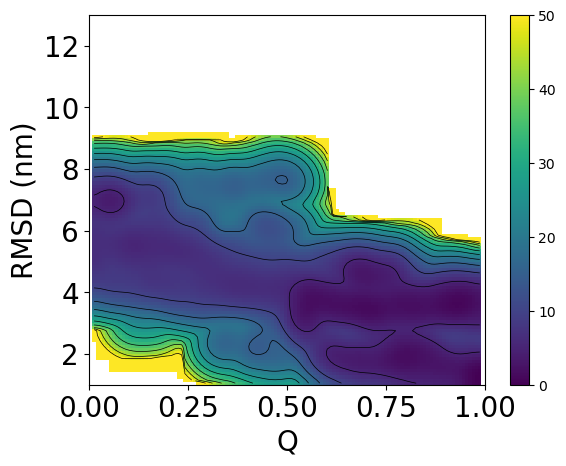

In [13]:
data=np.genfromtxt("/project/zerze/ayushg/argonne/ddmd/analysis/FED/colvar_PTWTE_WTM_Gul")
ignore=25000
time=np.copy(data[ignore:,16])
energy=np.copy(data[ignore:,1])
bias=np.copy(data[ignore:,3]+data[ignore:,9]+data[ignore:,12]+data[ignore:,14])
cmap=np.copy(data[ignore:,7])
rmsd=np.copy(data[ignore:,17])*10.0 # to convert from nm to A

logweights2 = beta*bias
logweights2 -= np.amax(logweights2)
weights2 = np.exp(logweights2)

rmsd_lim_min=min(min(rmsd),min(RMSD))
rmsd_lim_max=max(max(rmsd),max(RMSD))

H2, xedges1, yedges1 = np.histogram2d(cmap, rmsd, weights=weights2, bins=(120,120),range=[[0.01,0.99],[rmsd_lim_min,rmsd_lim_max]])
H2 = H2.T
H2=-(1/beta)*np.log(gaussian_filter(H2, sigma=3))
H2 -= np.amin(H2) 

X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H2, vmin=0,vmax=50)
plt.colorbar()
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.

plt.contour(x,y, H2 ,np.arange(0,55,5),colors='black',linewidths=0.5)

plt.xlim([0,1])
plt.ylim([rmsd_lim_min,rmsd_lim_max])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (nm)",fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.show()

/home/agupta55/tmp/ipykernel_2664415/4179649341.py:5: RuntimeWarning: divide by zero encountered in log
  H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))


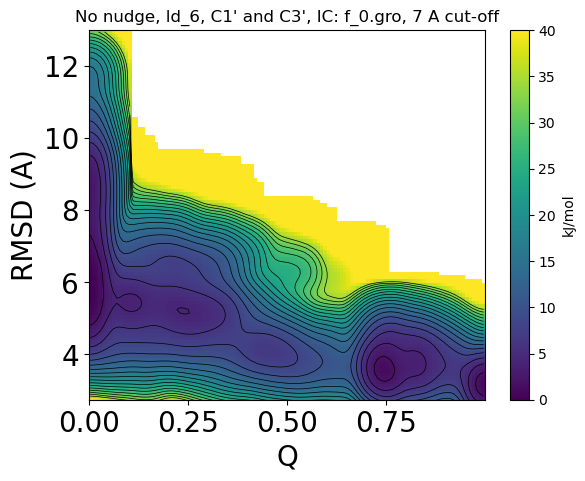

In [16]:
# Q and RMSD

H1, xedges1, yedges1 = np.histogram2d(Q_df, RMSD, weights=weights, bins=(120,120),range=[[Q_df.min(),Q_df.max()],[rmsd_lim_min,rmsd_lim_max]])
H1 = H1.T
H1=-(1/beta)*np.log(gaussian_filter(H1, sigma=3))
H1 -= np.amin(H1) 
X1, Y1 = np.meshgrid(xedges1, yedges1)
plt.pcolormesh(X1, Y1, H1, vmin=0,vmax=40)
plt.colorbar(label="kJ/mol")
x = (X1[1:,1:]+X1[:-1,:-1])/2.
y = (Y1[1:,1:]+Y1[:-1,:-1])/2.
#plt.contour(x,y, H1,20,vmin=0,vmax=20,colors='black',linewidths=0.5)
plt.contour(x,y, H1 ,np.arange(0,35,2),colors='black',linewidths=0.5)

plt.xlim([Q_df.min(),Q_df.max()])
plt.ylim([RMSD.min(),RMSD.max()])

plt.xlabel("Q", fontsize=20)
plt.ylabel("RMSD (A)",fontsize=20)
plt.title("No nudge, ld_6, C1' and C3', IC: f_0.gro, 7 A cut-off")
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [17]:
sub_df = df[(df.gpu_id=='0') & (df.frame==0)]
print(sub_df)

                                                     pdb  \
0      /project/zerze/ayushg/argonne/configs/configs_...   
1000   /project/zerze/ayushg/argonne/configs/configs_...   
2000   /project/zerze/ayushg/argonne/configs/configs_...   
3000   /project/zerze/ayushg/argonne/configs/configs_...   
4000   /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   
...                                                  ...   
76000  /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   
77000  /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   
78000  /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   
79000  /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   
80000  /project/zerze/ayushg/argonne/ddmd/rna3/test/m...   

                                                     dcd  frame      rmsd  \
0      /project/zerze/ayushg/argonne/ddmd/rna3/test_R...      0  9.061195   
1000   /project/zerze/ayushg/argonne/ddmd/rna3/test_R...      0  8.916673   
2000   /project/zerze/ayushg/argonne/ddmd/rna3/t

In [21]:
sub_df.sys_label.unique()

array(['md_run_0_1691961912', 'md_run_0_1691964779',
       'md_run_0_1691967683', 'md_run_0_1691970550',
       'md_run_0_1691973424', 'md_run_0_1691976317',
       'md_run_0_1691979218', 'md_run_0_1691982119',
       'md_run_0_1691985040', 'md_run_0_1691988013',
       'md_run_0_1691990942', 'md_run_0_1691993883',
       'md_run_0_1691996819', 'md_run_0_1691999782',
       'md_run_0_1692002726', 'md_run_0_1692005671',
       'md_run_0_1692008618', 'md_run_0_1692011580',
       'md_run_0_1692014535', 'md_run_0_1692017500',
       'md_run_0_1692020487', 'md_run_0_1692023462',
       'md_run_0_1692026447', 'md_run_0_1692029442',
       'md_run_0_1692032435', 'md_run_0_1692035432',
       'md_run_0_1692038413', 'md_run_0_1692041402',
       'md_run_0_1692044405', 'md_run_0_1692047448',
       'md_run_0_1692050484', 'md_run_0_1692053506',
       'md_run_0_1692056571', 'md_run_0_1692059594',
       'md_run_0_1692062622', 'md_run_0_1692065688',
       'md_run_0_1692068739', 'md_run_0_169207